In [352]:
import sys
import os
# Get the path to the project root directory (PBGSK)
# 'os.path.abspath('..')' goes one level up from the 'notebooks' directory
project_root = os.path.abspath('..')
print(f"Project root directory: {project_root}")
# Add the project root to the system path if it's not already there
if project_root not in sys.path:
    sys.path.append(project_root)

from src.utils.data_importer import data_loader


Project root directory: c:\Users\romul\Repositories\pBGSK


In [353]:
import pandas as pd
import random
import numpy as np
import sys
import sklearn as sk
import matplotlib.pyplot as plt


In [354]:
df = data_loader('tic_tac_toe_endgame')


In [355]:
mapping = { 'x': 1, 'o': -1, 'b': 0 }
df.data.features = df.data.features.replace(mapping)

C:\Users\romul\AppData\Local\Temp\ipykernel_12068\1260285718.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.data.features = df.data.features.replace(mapping)


In [356]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from ucimlrepo import fetch_dataset

In [ ]:

class Individual:
    def __init__(self,data_set_name: str,individual_id :int, features: list,X_train,X_test,y_train, y_test,columns_names):
        """Cada individuo possui um vetor binário representando a seleção de features."""
        self.data_set_name = data_set_name
        self.number_of_features = int(np.sum(features))
        self.individual_id = individual_id
        self.features = features
        self.numeric_features = features +0
        
        self.column_names = columns_names
        self.X_train = X_train
        self.X_test= X_test
        self.y_train = y_train
        self.y_test = y_test
        #sk.model_selection.train_test_split(self.features, self.targets, test_size=0.33, random_state=42)
        self.score = 0.0
        self.classifier = KNeighborsClassifier(n_neighbors=5)
        self.df = None
    def calculate_fitness(self):
        """ acuracia"""
    # Get the indices of the selected features (where feature == 1)
        #selected_indices = np.where(self.features == 1)[0]
        
        if sum(self.features) == 0:
            self.score = 0.0
            return

        # Select the features from the data
        X_train_selected = self.X_train.loc[:, self.features]
        X_test_selected = self.X_test.loc[:, self.features]

        # Train and score the model
        self.classifier.fit(X_train_selected, self.y_train)
        y_pred = self.classifier.predict(X_test_selected)
        self.score = accuracy_score(self.y_test, y_pred)
class Population:
    def __init__(self, individuals: list):
        self.individuals = individuals
    def sort_by_fitness(self):
        self.individuals.sort(key=lambda ind: ind.score,  reverse=True)
        self.df.sort_values('score',ascending=False)
    def ploting_freq(self):
        import seaborn as sns

        df_p = pd.DataFrame()
        for column in self.df.columns[:-2]:
            row ={ 'feature':f'{column}','score':self.df[self.df.loc[:,column]]['score'],'n_features':self.df[self.df.loc[:,column]]['n_features']}
            row =pd.DataFrame(row)
            df_p=pd.concat([row,df_p],ignore_index=True)
        f, ax = plt.subplots(figsize=(7, 6))
        # Plot the orbital period with horizontal boxes
        sns.boxplot(
            df_p, x="score", y="feature", hue="feature",
            whis=[0, 100], width=.6, palette="vlag"
        )
        sns.stripplot(df_p, x="score", y="feature", size=4, color=".3")

        ax.xaxis.grid(True)
        ax.set(ylabel="")
        sns.despine(trim=True, left=True)
    def dataframe(self):
        lista_features = [indiv.features for indiv in self.individuals]
        pop_df = pd.DataFrame(np.array(lista_features),columns=self.individuals[0].column_names)
        pop_df['score']= [indiv.score for indiv in self.individuals]
        pop_df['n_features'] = pop_df.loc[:,pop_df.columns!='score'].sum(axis=1)
        self.df =pop_df
        return pop_df

In [358]:
def population_creation(num_population:int, lower_k :int, upper_k:int,data_tuple,data_set_name,columns_names) -> Population:
    """Criando uma população inicial de indivíduos. com features variando entre lower_k e upper_k.
    num_population: número de indivíduos na população"""
    X_train, X_test, y_train, y_test = data_tuple
    population = []
    total_features = X_train.shape[1]
    for i in range(num_population):
        k = lower_k + random.random()*(upper_k-lower_k)
        k = int(k)
        features = random.sample(range(0, total_features), k)
        bin_feature = np.array([False]*total_features)

        for feature in features:
            bin_feature[feature] = True  # Mark selected

        indiv = Individual(data_set_name=data_set_name,
                individual_id=i,
                features=bin_feature,
                X_train=X_train,  # Pass the reference
                y_train=y_train,  # Pass the reference
                X_test=X_test,    # Pass the reference
                y_test=y_test,     # Pass the reference
                columns_names=columns_names
            )
        population.append(indiv)
    pop =Population(population)
    return pop

In [359]:
def stage_dimension(gem_max:int, gem_atual:int,k_rate:float, num_individuos:int):
    """gem_max é numero máximo de gerações
        gem_atual é a geração atual
        d_junior é o número de indivíduos juniores
        d_senior é o número de indivíduos seniores
        k_rate é o knowledge rate"""
        
    d_junior = int(num_individuos*((gem_max - gem_atual)/gem_max)**k_rate)
    d_senior = num_individuos - d_junior
    return d_junior, d_senior


In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
mapping = { 'x': 1, 'o': -1, 'b': 0 }
data_set_name = 'tic_tac_toe_endgame'
df = data_loader(data_set_name)
columns_names = df.data.features.columns
df.data.features = df.data.features.replace(mapping)
X =df.data.features
y = np.ravel(df.data.targets)
data_tuple = sk.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
# 2. Create the population
# This passes the data references to all individuals
num_population = 50
lower_k=1
upper_k=4
pop = population_creation(
    num_population=num_population,
    lower_k=lower_k,
    upper_k=upper_k,
    data_tuple=data_tuple,
    data_set_name=data_set_name,
    columns_names=columns_names
)

# 3. Calculate fitness for each individual
for indiv in pop.individuals:
    indiv.calculate_fitness()
    print(f"Individual {indiv.individual_id} Features: {indiv.number_of_features} Score: {indiv.score:.4f}")
#    def beginners_sharing_phase()
knowledge_ratio =0.5
for t in range(1,num_population-1):
    for d in range(len(pop.individuals[0].features)):
        if random.random() <knowledge_ratio:
            rand_idx = int(random.random()*len(pop.individuals))
            rand_indiv = pop.individuals[rand_idx]
            xt = pop.individuals[t]
            xt0 = pop.individuals[t-1]
            xt2 = pop.individuals[t+1]
            if pop.individuals[t].score>rand_indiv.score:
                xtk =xt.numeric_features[d] + (xt0.numeric_features[d]-xt2.numeric_features[d] )+(rand_indiv.numeric_features[d] - xt.numeric_features[d])
            else:
                xtk =xt.numeric_features[d] + (xt0.numeric_features[d] -xt2.numeric_features[d] )+(xt.numeric_features[d]- rand_indiv.numeric_features[d] )
            pop.individuals[t].features[d] =(xtk >0)
            pop.individuals[t].numeric_features[d] = xtk +0

C:\Users\romul\AppData\Local\Temp\ipykernel_12068\404951151.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.data.features = df.data.features.replace(mapping)


Individual 0 Features: 2 Score: 0.5962
Individual 1 Features: 1 Score: 0.6782
Individual 2 Features: 1 Score: 0.6782
Individual 3 Features: 2 Score: 0.6593
Individual 4 Features: 3 Score: 0.6183
Individual 5 Features: 1 Score: 0.6782
Individual 6 Features: 3 Score: 0.7035
Individual 7 Features: 3 Score: 0.6467
Individual 8 Features: 1 Score: 0.6782
Individual 9 Features: 1 Score: 0.6782
Individual 10 Features: 3 Score: 0.5994
Individual 11 Features: 3 Score: 0.6751
Individual 12 Features: 1 Score: 0.6782
Individual 13 Features: 3 Score: 0.6562
Individual 14 Features: 1 Score: 0.6782
Individual 15 Features: 1 Score: 0.6782
Individual 16 Features: 3 Score: 0.6751
Individual 17 Features: 1 Score: 0.6782
Individual 18 Features: 3 Score: 0.6025
Individual 19 Features: 2 Score: 0.6088
Individual 20 Features: 3 Score: 0.6751
Individual 21 Features: 2 Score: 0.6719
Individual 22 Features: 3 Score: 0.6940
Individual 23 Features: 3 Score: 0.6372
Individual 24 Features: 2 Score: 0.6782
Individual

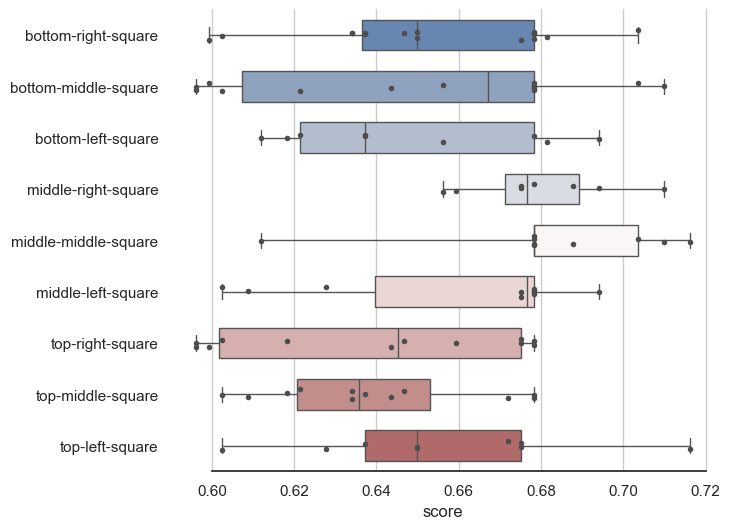

In [361]:
pop.dataframe()
pop.sort_by_fitness()
pop.ploting_freq()

In [363]:
xri = int(random.random()*len(pop.individuals))
xr = pop.individuals[xri]
xti = 5
xt = pop.individuals[xti]
xt0 = pop.individuals[xti-1]
xt2 = pop.individuals[xti+1]
#if xt.score > xr.score:
xtk =xt.numeric_features + (xt0.numeric_features-xt2.numeric_features)+(xr.numeric_features+ xt.numeric_features)
print((xtk>0)+0)

[0 0 1 1 0 1 1 1 0]


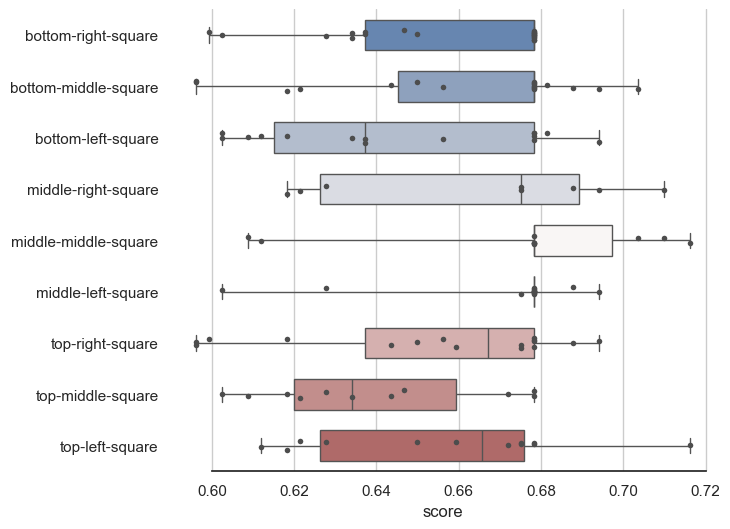

In [364]:
pop.dataframe()
pop.sort_by_fitness()
pop.ploting_freq()